<a href="https://colab.research.google.com/github/avinanakarmi/CS634_FinalTermProject_ConfusionMatrix/blob/main/ComparingClassificationAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install statsmodels

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration and Preprocessing

In [3]:
!pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

htru2 = fetch_ucirepo(id=372)

X = htru2.data.features
y = htru2.data.targets

df = pd.concat([X, y], axis=1)

df.describe()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [5]:
df.head()

,Profile_mean,Profile_stdev,Profile_skewness,Profile_kurtosis,DM_mean,DM_stdev,DM_skewness,DM_kurtosis,class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
print("Dataframe shape", df.shape)
print()
print("Check type of data")
print(df.dtypes)
print()
print("Check for na")
print(df.isna().sum())

Dataframe shape (17898, 9)

Check type of data
Profile_mean        float64
Profile_stdev       float64
Profile_skewness    float64
Profile_kurtosis    float64
DM_mean             float64
DM_stdev            float64
DM_skewness         float64
DM_kurtosis         float64
class                 int64
dtype: object

Check for na
Profile_mean        0
Profile_stdev       0
Profile_skewness    0
Profile_kurtosis    0
DM_mean             0
DM_stdev            0
DM_skewness         0
DM_kurtosis         0
class               0
dtype: int64


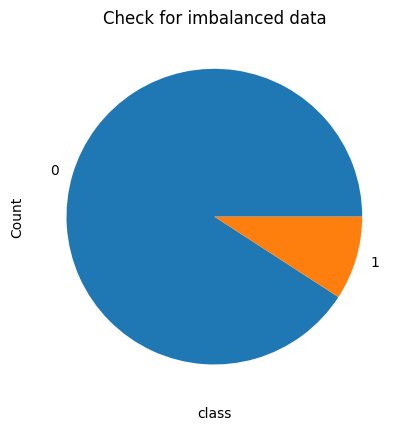

In [7]:
class_dist = df["class"].value_counts().sort_index()
plt.pie(class_dist.values, labels=class_dist.index)

plt.title("Check for imbalanced data")
plt.xlabel('class')
plt.ylabel('Count')

plt.show()

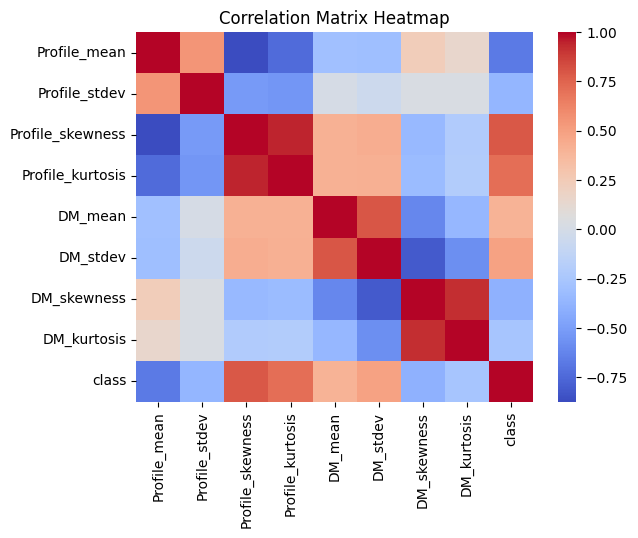

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
  if df[col].dtype == 'object':
    df[col] = le.fit_transform(df[col])

corr_matrix = df.corr(numeric_only = True)

sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')

plt.title('Correlation Matrix Heatmap')

plt.show()

In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df.drop(columns=['class'])

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Feature         VIF
0      Profile_mean   97.279032
1     Profile_stdev   77.633219
2  Profile_skewness   26.819464
3  Profile_kurtosis   16.032502
4           DM_mean    4.184163
5          DM_stdev   15.872033
6       DM_skewness  100.633763
7       DM_kurtosis   27.343508


# Model Selection


1.   **Decision Trees**:  Even though there is multicollinearity (as shown by VIF values), Decision Trees are not affected by this because they split the data based on single features at each node.
2. **Bayesian Networks**: BayNets are generally not highly sensitive to multicollinearity, as they focus on conditional independence between variables rather than direct linear relationships.
3.   **Conv1D**: The Conv1D layer applies filters across the input features in a sliding window manner.



# Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
def predict_with_random_forest(X_train, y_train, X_test):
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)
  return y_pred

# Decision tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
def predict_with_decision_tree(X_train, y_train, X_test):
  dt.fit(X_train, y_train)

  y_pred = dt.predict(X_test)
  return y_pred

# Conv1D

In [12]:
!pip install tensorflow

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = None
def predict_with_conv1d(X_train, y_train, X_test):
  global model
  if model is None:
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
  history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
  y_pred = model.predict(X_test)
  return y_pred


# Util Functions

In [14]:
from sklearn.metrics import confusion_matrix
from typing import TypedDict
import statistics

class Measures(TypedDict):
    tpr: float
    tnr: float
    precision: float
    npv: float
    fpr: float
    fdr: float
    fnr: float
    acc: float
    f1: float
    err_rate: float
    bacc: float
    tss: float
    hss: float
    bss: float
    auc: float

def get_classification_outcomes(y_true, y_pred):
  tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
  return tn, fp, fn, tp

def visualize_model_performance(tn, fp, fn, tp ):
  print()
  print('Visualizing Model Performance')
  print(f"{'':<5} {'':<5} {'Actual':<5}")
  print(f"{'':<5} {'':<5} {'Positive':<5} {'Negative':<5}")
  print(f"{'Predicted':<5} {'Positive':<5} {tp:<5} {fp:<5}")
  print(f"{'':<5} {'Negative':<5} {fn:<5} {tn:<5}")
  print()

def safe_divide(numerator, denominator):
    if denominator == 0:
      return 0
    else:
      return numerator / denominator

def calculate_measures(y_true, y_pred) -> Measures:
  measures = {}
  tn, fp, fn, tp = get_classification_outcomes(y_true, y_pred)
  # visualize_model_performance(tn, fp, fn, tp )
  p = tp + fn
  n = tn + fp
  measures['tpr'] = safe_divide(tp, p)
  measures['tnr'] = safe_divide(tn, n)
  measures['precision'] = safe_divide(tp, (fp + tp))
  measures['npv'] = safe_divide(tn, (tn + fn))
  measures['fpr'] = safe_divide(fp, n)
  measures['fdr'] = safe_divide(fp, (fp + tp))
  measures['fnr'] = safe_divide(fn, n)
  measures['acc'] = safe_divide((tp + tn), (p + n))
  measures['f1'] = safe_divide((2 * measures['precision'] * measures['tpr']), (measures['precision'] + measures['tpr']))
  measures['err_rate'] = safe_divide((fp + fn), (p + n))
  measures['bacc'] = (measures['tpr'] + measures['tnr']) / 2
  measures['tss'] = (safe_divide(tp, (fn + tp))) - (safe_divide(fp, (fp + tn)))
  measures['hss'] = safe_divide(2 * (tp * tn - fp * fn), ((tp + fn) * (fn + tn) + (tp + fp) * (fp * tn)))
  bs = statistics.mean((y_true - y_pred) ** 2)
  y_mean = statistics.mean(y_test)
  measures['bss'] = safe_divide(bs, statistics.mean((y_test - y_mean) ** 2))
  # measures['auc'] =

  return Measures(measures)

# Train and test dataset preparation

In [15]:
#### Visualize measure in each fold
from typing import Dict, List

def viz_measures_k_fold(k, **kwargs: Measures):
  suffix = 'th'
  if k == 1: suffix = 'st'
  elif k == 2: suffix = 'nd'
  elif k == 3: suffix = 'rd'
  print()
  print('Visualizing Model Performance in ', k, 'th fold:')
  print(f"{'Measure':<15}", end='')
  for model in kwargs.keys():
    print(f'{model:<15}', end='')
  print()
  tup = next(iter(kwargs.items()))
  for measure in tup[1].keys():
    print(f'{measure:<15}', end='')
    for _, measures in kwargs.items():
      print(f'{measures[measure]:<15.2f}', end='')
    print()
  print()

def viz_measures_model(model, measures: List[Measures]):
  print()
  print('Visualizing ', model, 'Performance in Each Fold')
  print(f"{'Measure':<15}", end='')
  for fold in range(1, 11):
    print(f'{fold:<15}', end='')
  print()
  for measure in measures[0].keys():
    print(f'{measure:<15}', end='')
    for k_measures in measures:
      print(f'{k_measures[measure]:<15.2f}', end='')
    print()
  print()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE


rf_measures = []
dt_measures = []
conv1D_measures = []

### Ensures each fold has the same proportion of classes as the complete dataset.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for idx, (train_index, test_index) in enumerate(kf.split(X, y), start = 1):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = df['class'].iloc[train_index], df['class'].iloc[test_index]

    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

    rf_pred = predict_with_random_forest(X_resampled, y_resampled, X_test)
    rf_measures.append(calculate_measures(y_test, rf_pred))


    dt_pred = predict_with_decision_tree(X_resampled, y_resampled, X_test)
    dt_measures.append(calculate_measures(y_test, dt_pred))

    conv1d_pred = predict_with_conv1d(X_resampled, y_resampled, X_test)
    conv1d_pred = (conv1d_pred > 0.5).astype(int)
    conv1D_measures.append(calculate_measures(y_test, [item for row in conv1d_pred for item in row]))

    viz_measures_k_fold(idx, RandomForst = rf_measures[idx - 1], DecisionTree=dt_measures[idx - 1], Conv1D=conv1D_measures[idx - 1])

In [ ]:
viz_measures_model("Random Forest", rf_measures)

In [ ]:
viz_measures_model("Decision Tree", dt_measures)

In [ ]:
viz_measures_model("Conv 1D", conv1D_measures)

In [ ]:
## Average measures
def calc_avg_measures(measures):
  avg = {}
  metrics = measures[0].keys();
  for metric in metrics:
    for i in range(0, 10):
      avg[metric] = avg.get(metric, 0) + measures[i][metric]
    avg[metric] = avg[metric] / 10
  return avg

viz_measures_k_fold(0, RandomForest = calc_avg_measures(rf_measures), DecisionTree=calc_avg_measures(dt_measures), Conv1D=calc_avg_measures(conv1D_measures))